# Introduction
It is crucial to understand customer behavior in any industry. I realized this last year when my chief marketing officer asked me – “Can you tell me which existing customers should we target for our new product?”

That was quite a learning curve for me. I quickly realized as a data scientist how important it is to segment customers so my organization can tailor and build targeted strategies. This is where the concept of clustering came in ever so handy!

Problems like segmenting customers are often deceptively tricky because we are not working with any target variable in mind. We are officially in the land of unsupervised learning where we need to figure out patterns and structures without a set outcome in mind. It’s both challenging and thrilling as a data scientist.

In [1]:
from IPython.display import Image

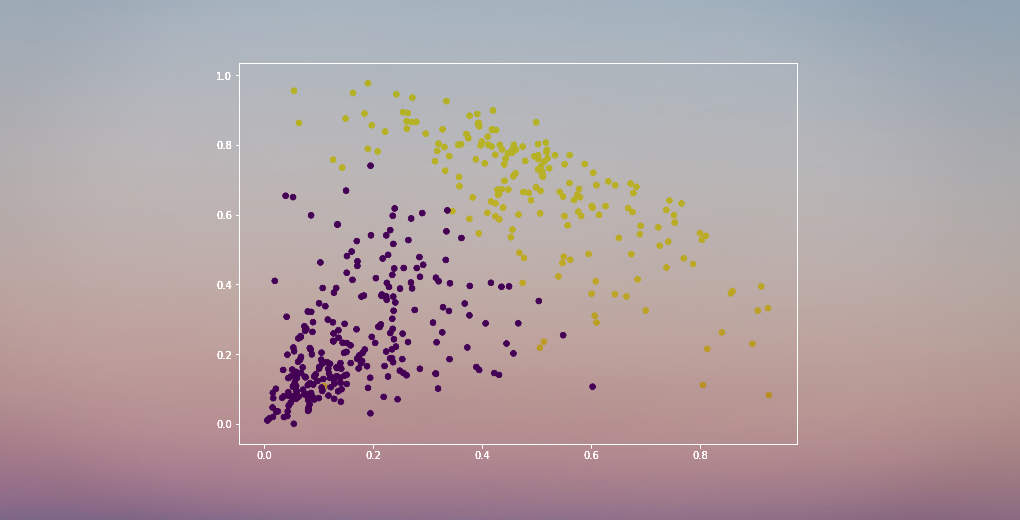

In [2]:
Image("hierarchical_clustering.jpg")

# What is Hierarchical Clustering?

Let’s say we have the below points and we want to cluster them into groups:

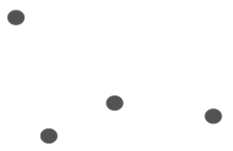

In [3]:
Image("Screenshot-from-2019-05-15-13-10-32.png")

We can assign each of these points to a separate cluster:

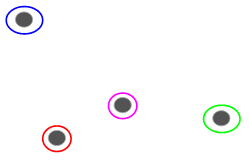

In [4]:
Image("Screenshot-from-2019-05-15-13-11-28.png")

Now, based on the similarity of these clusters, we can combine the most similar clusters together and repeat this process until only a single cluster is left:

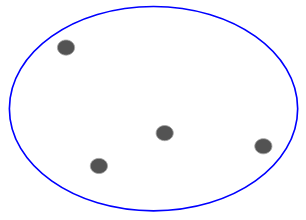

In [5]:
Image("Screenshot-from-2019-05-15-13-12-35.png")

We are essentially building a hierarchy of clusters. That’s why this algorithm is called hierarchical clustering. I will discuss how to decide the number of clusters in a later section. For now, let’s look at the different types of hierarchical clustering.

### Types of Hierarchical Clustering
There are mainly two types of hierarchical clustering:

* Agglomerative hierarchical clustering
* Divisive Hierarchical clustering<br>
Let’s understand each type in detail.

### Agglomerative Hierarchical Clustering
We assign each point to an individual cluster in this technique. Suppose there are 4 data points. We will assign each of these points to a cluster and hence will have 4 clusters in the beginning:

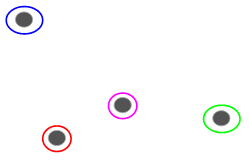

In [6]:
Image("Screenshot-from-2019-05-15-13-11-28 (1).png")

Then, at each iteration, we merge the closest pair of clusters and repeat this step until only a single cluster is left:

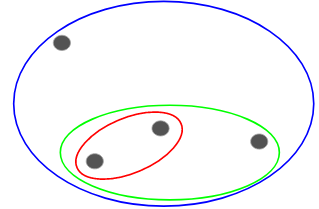

In [7]:
Image("Screenshot-from-2019-05-15-13-31-06.png")

We are merging (or adding) the clusters at each step, right? Hence, this type of clustering is also known as additive hierarchical clustering.

### Divisive Hierarchical Clustering
Divisive hierarchical clustering works in the opposite way. Instead of starting with n clusters (in case of n observations), we start with a single cluster and assign all the points to that cluster.

So, it doesn’t matter if we have 10 or 1000 data points. All these points will belong to the same cluster at the beginning:

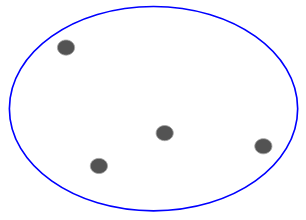

In [8]:
Image("Screenshot-from-2019-05-15-13-12-35 (1).png")

Now, at each iteration, we split the farthest point in the cluster and repeat this process until each cluster only contains a single point:

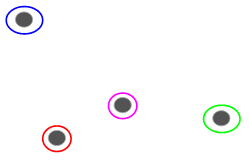

In [9]:
Image("Screenshot-from-2019-05-15-13-11-28 (2).png")

We are splitting (or dividing) the clusters at each step, hence the name divisive hierarchical clustering.

Agglomerative Clustering is widely used in the industry and that will be the focus in this article. Divisive hierarchical clustering will be a piece of cake once we have a handle on the agglomerative type.

### Steps to Perform Hierarchical Clustering
We merge the most similar points or clusters in hierarchical clustering – we know this. Now the question is – how do we decide which points are similar and which are not? It’s one of the most important questions in clustering!

Here’s one way to calculate similarity – Take the distance between the centroids of these clusters. The points having the least distance are referred to as similar points and we can merge them. We can refer to this as a distance-based algorithm as well (since we are calculating the distances between the clusters).

In hierarchical clustering, we have a concept called a proximity matrix. This stores the distances between each point. Let’s take an example to understand this matrix as well as the steps to perform hierarchical clustering.

#### Setting up the Example

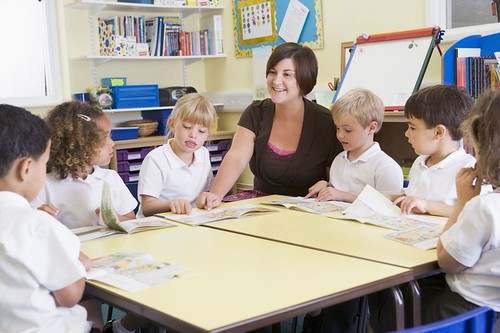

In [10]:
Image("teacher-student.jpg")

Suppose a teacher wants to divide her students into different groups. She has the marks scored by each student in an assignment and based on these marks, she wants to segment them into groups. There’s no fixed target here as to how many groups to have. Since the teacher does not know what type of students should be assigned to which group, it cannot be solved as a supervised learning problem. So, we will try to apply hierarchical clustering here and segment the students into different groups.

Let’s take a sample of 5 students:

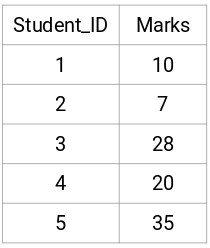

In [11]:
Image("Screenshot-from-2019-05-17-16-12-33.png")

## Creating a Proximity Matrix
First, we will create a proximity matrix which will tell us the distance between each of these points. Since we are calculating the distance of each point from each of the other points, we will get a square matrix of shape n X n (where n is the number of observations).

Let’s make the 5 x 5 proximity matrix for our example:

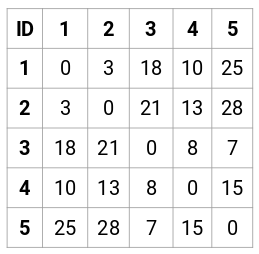

In [12]:
Image("Screenshot-from-2019-05-15-14-46-36.png")

The diagonal elements of this matrix will always be 0 as the distance of a point with itself is always 0. We will use the Euclidean distance formula to calculate the rest of the distances.

#### Steps to Perform Hierarchical Clustering
Step 1: First, we assign all the points to an individual cluster:

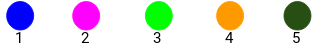

In [13]:
Image("Screenshot-from-2019-05-15-14-54-20.png")

Different colors here represent different clusters. You can see that we have 5 different clusters for the 5 points in our data.

#### Step 2:
Next, we will look at the smallest distance in the proximity matrix and merge the points with the smallest distance. We then update the proximity matrix:

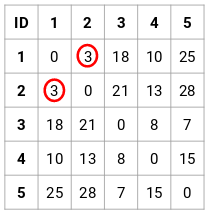

In [14]:
Image("Screenshot-from-2019-05-15-14-57-30.png")

Here, the smallest distance is 3 and hence we will merge point 1 and 2:

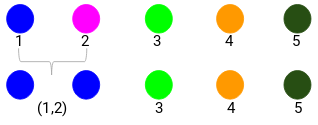

In [15]:
Image("Screenshot-from-2019-05-15-14-58-11.png")

Let’s look at the updated clusters and accordingly update the proximity matrix:

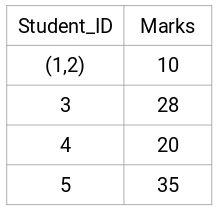

In [16]:
Image("Screenshot-from-2019-05-15-14-59-19.png")

Here, we have taken the maximum of the two marks (7, 10) to replace the marks for this cluster. Instead of the maximum, we can also take the minimum value or the average values as well. Now, we will again calculate the proximity matrix for these clusters:

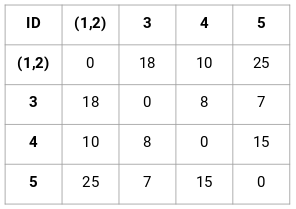

In [17]:
Image("Screenshot-from-2019-05-15-15-01-11.png")

#### Step 3:
We will repeat step 2 until only a single cluster is left.

So, we will first look at the minimum distance in the proximity matrix and then merge the closest pair of clusters. We will get the merged clusters as shown below after repeating these steps:

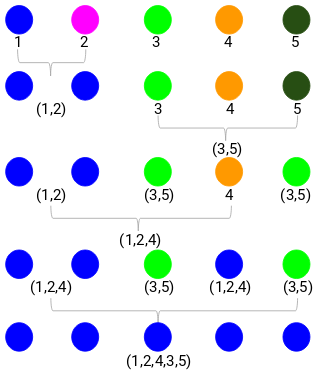

In [18]:
Image("Screenshot-from-2019-05-15-15-03-17.png")

We started with 5 clusters and finally have a single cluster. This is how agglomerative hierarchical clustering works. But the burning question still remains – how do we decide the number of clusters? Let’s understand that in the next section.

### How should we Choose the Number of Clusters in Hierarchical Clustering?

To get the number of clusters for hierarchical clustering, we make use of an awesome concept called a Dendrogram.

**A dendrogram is a tree-like diagram that records the sequences of merges or splits.**

Let’s get back to our teacher-student example. Whenever we merge two clusters, a dendrogram will record the distance between these clusters and represent it in graph form. Let’s see how a dendrogram looks like:

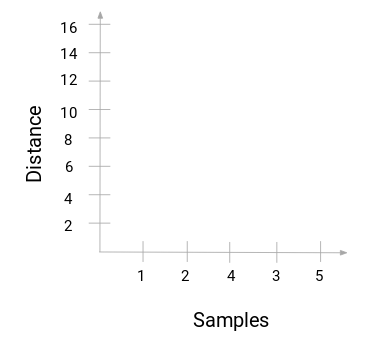

In [19]:
Image("Screenshot-from-2019-05-16-17-11-39.png")

We have the samples of the dataset on the x-axis and the distance on the y-axis. Whenever two clusters are merged, we will join them in this dendrogram and the height of the join will be the distance between these points. Let’s build the dendrogram for our example:

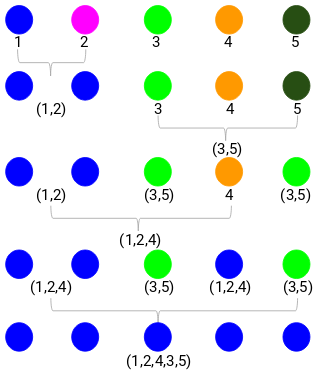

In [20]:
Image("Screenshot-from-2019-05-15-15-03-17 (1).png")

Take a moment to process the above image. We started by merging sample 1 and 2 and the distance between these two samples was 3 (refer to the first proximity matrix in the previous section). Let’s plot this in the dendrogram:



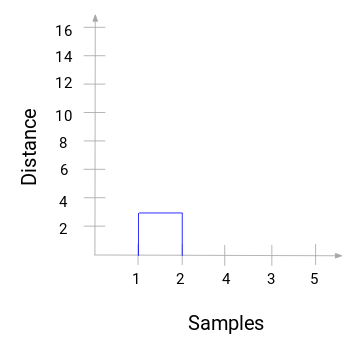

In [21]:
Image("Screenshot-from-2019-05-16-18-06-37.png")

Here, we can see that we have merged sample 1 and 2. The vertical line represents the distance between these samples. Similarly, we plot all the steps where we merged the clusters and finally, we get a dendrogram like this:

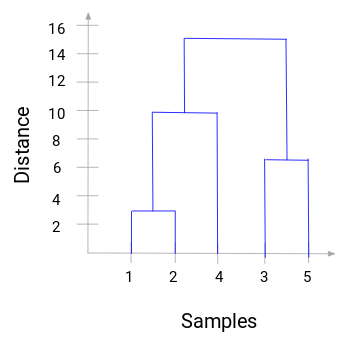

In [22]:
Image("Screenshot-from-2019-05-16-18-10-06.png")

We can clearly visualize the steps of hierarchical clustering. More the distance of the vertical lines in the dendrogram, more the distance between those clusters.

Now, we can set a threshold distance and draw a horizontal line (Generally, we try to set the threshold in such a way that it cuts the tallest vertical line). Let’s set this threshold as 12 and draw a horizontal line:

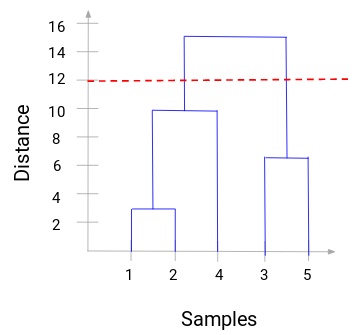

In [23]:
Image("Screenshot-from-2019-05-16-18-12-55.png")

The number of clusters will be the number of vertical lines which are being intersected by the line drawn using the threshold. In the above example, since the red line intersects 2 vertical lines, we will have 2 clusters. One cluster will have a sample (1,2,4) and the other will have a sample (3,5). Pretty straightforward, right?

This is how we can decide the number of clusters using a dendrogram in Hierarchical Clustering. In the next section, we will implement hierarchical clustering which will help you to understand all the concepts that we have learned in this article.

#### Solving the Wholesale Customer Segmentation problem using Hierarchical Clustering

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
data = pd.read_csv('Wholesale customers data.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


There are multiple product categories – Fresh, Milk, Grocery, etc. The values represent the number of units purchased by each client for each product. Our aim is to make clusters from this data that can segment similar clients together. We will, of course, use Hierarchical Clustering for this problem.

But before applying Hierarchical Clustering, we have to normalize the data so that the scale of each variable is the same. Why is this important? Well, if the scale of the variables is not the same, the model might become biased towards the variables with a higher magnitude like Fresh or Milk (refer to the above table).

So, let’s first normalize the data and bring all the variables to the same scale:

In [27]:
from sklearn.preprocessing import normalize
data_scaled = normalize(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.000065,0.000194,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.000079,0.000119,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294


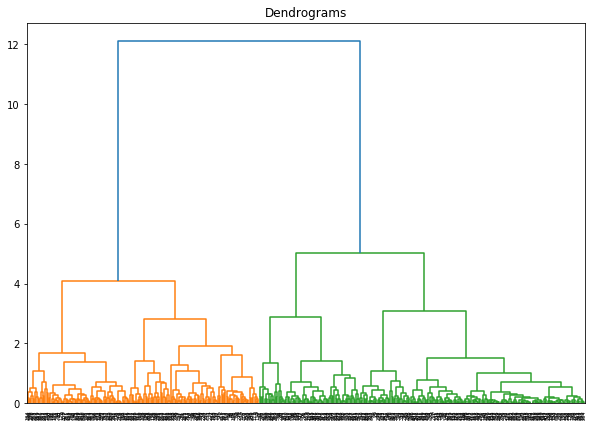

In [28]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

The x-axis contains the samples and y-axis represents the distance between these samples. The vertical line with maximum distance is the blue line and hence we can decide a threshold of 6 and cut the dendrogram:

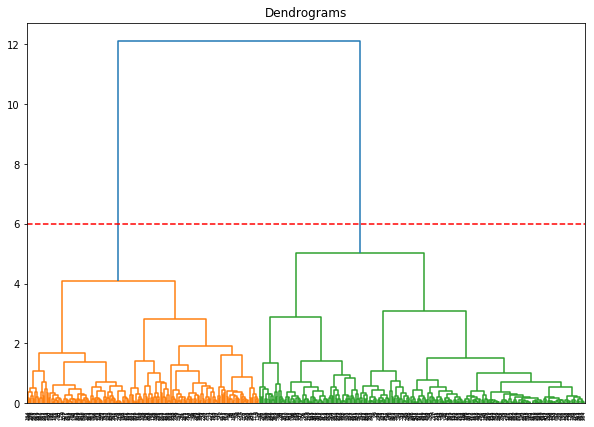

In [29]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=6, color='r', linestyle='--')

We have two clusters as this line cuts the dendrogram at two points. Let’s now apply hierarchical clustering for 2 clusters:

In [30]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data_scaled)

array([1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,

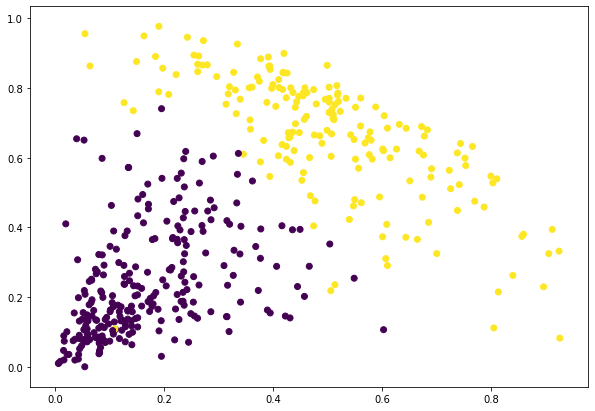

In [31]:
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['Milk'], data_scaled['Grocery'], c=cluster.labels_) 

Hierarchical clustering is a super useful way of segmenting observations. The advantage of not having to pre-define the number of clusters gives it quite an edge over k-Means.